<a href="https://colab.research.google.com/github/DaverArenas/BootCamp-Python-Udemy/blob/master/DA_Anal_Sentimientos_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de sentimientos
Existen dos formas clásicas de hacer análisis de sentimientos:

* Enfoque basado en tokens: A partir de un diccionario de palabras positivas, negativas y neutrales, se cuentan la cantidad de palabras positivas y negativas en el texto y se determina el sentimiento del texto como la cantidad que prevalece.

* Enfoque basado en aprendizaje automático: a partir de una base de conocimientos con datos preetiquetados en  positivo, negativo y neutral, se entrena un modelo de aprendizaje automático para clasificar el texto.

El análisis de sentimientos es una forma de evaluar lo que se dice en un texto sobre un tema determinado. Se puntúa utilizando valores de polaridad que van de 1 a -1. Los valores más cercanos a 1 indican más positividad, mientras que los valores más cercanos a -1 indican más negatividad.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 6.8 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 9.0 MB 63.2 MB/s 
     |████████████████████████████████| 139 kB 58.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.


In [4]:
#import snscrape.modules.twitter as sntwitter
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from textblob import TextBlob
import re

In [7]:
path='/content/drive/MyDrive/Analitics_Esp/'
df=pd.read_csv(path+'RCNTV_Clean.csv', encoding='utf-8-sig')

In [21]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/SearchRCNTV_.csv', encoding='utf-8-sig')

In [23]:
df2.head(5)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,perdón no fue el mismo q hizo botar a del por...
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"ya habían hecho un refrito, ¿no?"
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,nunca pude ver esa novela. dicen que es buení...
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,y todos unos fiascos.
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,avance de en las noches por .


In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,emojis,tweet,tweet_wE,tokens,tokens_clean,lemmas,tokens_stem
0,0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,perdón mismo hizo botar investigación volteo t...,1554616573301665792,mauronuma,[],NaN,[],NaN,"['@pulzo', '@petrogustavo', '@MauricioLizcano'...",[],[],perdón mismo hizo botar investigación volteo t...,perdón mismo hizo botar investigación volteo t...,"['perdón', 'mismo', 'hizo', 'botar', 'investig...","['perdón', 'mismo', 'hizo', 'botar', 'investig...","['perdón', 'mismo', 'hacer', 'botar', 'investi...","['perdon', 'mism', 'hiz', 'bot', 'investig', '..."
1,1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,hecho refrito,1554616085609078784,AltairPR,[],NaN,[],NaN,"['@TVCritica2017', '@BlogRumoreS', '@CanalRCN'...",[],[],hecho refrito,hecho refrito,"['hecho', 'refrito']","['hecho', 'refrito']","['hecho', 'refrito']","['hech', 'refrit']"
2,2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,nunca pude ver novela dicen buenísima,1554615783036272640,AltairPR,[],NaN,[],NaN,"['@TVCritica2017', '@BlogRumoreS', '@CanalRCN'...",[],[],nunca pude ver novela dicen buenísima,nunca pude ver novela dicen buenísima,"['nunca', 'pude', 'ver', 'novela', 'dicen', 'b...","['nunca', 'pude', 'ver', 'novela', 'dicen', 'b...","['nunca', 'poder', 'ver', 'novela', 'decir', '...","['nunc', 'pud', 'ver', 'novel', 'dic', 'buenis..."
3,3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,fiascos,1554615211725934594,mcardonarene,[],NaN,[],NaN,"['@TVCritica2017', '@BlogRumoreS', '@CanalRCN'...",[],[],fiascos,fiascos,['fiascos'],['fiascos'],['fiasco'],['fiasc']
4,4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,avance noches,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"['#factorx', '#CanalRCN']",[],avance noches,avance noches,"['avance', 'noches']","['avance', 'noches']","['avance', 'noches']","['avanc', 'noch']"


Podemos hacer una limpieza de texto sin quitar signos de puntuación todavía, ni stopWords

In [13]:
def  clean_text(df, text_field,new_text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[new_text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[!#?,.:";‘’]',' ', elem))
  return df

In [36]:
df_clean2=clean_text(df ,'content','tweet')

TypeError: ignored

In [22]:
df_clean=clean_text(df2 ,'content','tweet')

In [24]:
df_clean[['content','tweet']]

,content,tweet
0,@pulzo @petrogustavo Perdón @MauricioLizcano n...,perdón no fue el mismo q hizo botar a del por...
1,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,"ya habían hecho un refrito, ¿no?"
2,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,nunca pude ver esa novela. dicen que es buení...
3,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,y todos unos fiascos.
4,Avance de #factorx en las noches por #CanalRC...,avance de en las noches por .
...,...,...
4995,@CanalRCN Menos la cosa llamada Isabela,menos la cosa llamada isabela
4996,@CanalRCN Manuela,manuela
4997,@Clauval1256 @CanalRCN @Masterchef_Co jajaja y...,jajaja yo también lo pensé
4998,@CanalRCN @carogomezfilm Esa cosa llamada Isab...,esa cosa llamada isabela debería aprender alg...


Quitemos los emojis

In [25]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 7.4 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=880e07c09698d306f9af5e96921f3597ea1e83dcf2746765699af4c6337406a9
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [26]:
import emoji

Guardemos una columna con los emojis convertidos a texto

In [27]:
df_clean['tweet_wE']=df_clean['tweet'].apply(lambda text: emoji.demojize(text,language='es'))

In [28]:
df_clean['tweet']=df_clean['tweet'].apply(lambda text: emoji.replace_emoji(text,''))

In [29]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'[/]','', elem))

In [30]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'\s+',' ', elem))
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))

In [31]:
df_clean['tweet'][0]

'perdón no fue el mismo q hizo botar a del por una investigación sobre volteo de tierras y por adueñarse de unos terrenos en el eje cafetero cuando fue senador del partido de la u y fue el jefe del empalme. no me crean tan toche.'

In [32]:
analysis=TextBlob(df_clean['tweet'][0])

In [33]:
s=TextBlob('This is wrong')
s.sentiment

Sentiment(polarity=-0.5, subjectivity=0.9)

In [34]:
s=TextBlob('Esto está muy mal')
s.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

En estos momentos la función de detección de idioma y de traducción no está funcionando

## Uso de AWS con Comprehend

### Configuración de API y conección

Primero hay que crear un fichero con la configuración de las claves de uusario de AWS.

Crear un usuario en el servicio IAM, crearle una clave de acceso, se puede descagar el fichero .csv o copiar la clave desde ahí.

Crear un fichero .txt con esta estructura:

[default]

aws_access_key_id=

aws_secret_access_key=

[Referencia:](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html)

Copiemos el fichero en una carpeta en nuestro Drive, activemos el drive y comencemos:

In [19]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

In [20]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
text = "Este curso es una maravilla. Las clases virtuales también son buenas"
sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
sentiment

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '165',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 03 Aug 2022 23:30:23 GMT',
   'x-amzn-requestid': 'f912ce7e-efbb-41ce-87df-82bfa6a32d84'},
  'HTTPStatusCode': 200,
  'RequestId': 'f912ce7e-efbb-41ce-87df-82bfa6a32d84',
  'RetryAttempts': 0},
 'Sentiment': 'POSITIVE',
 'SentimentScore': {'Mixed': 7.289922359632328e-05,
  'Negative': 7.47397934901528e-05,
  'Neutral': 0.0025757814291864634,
  'Positive': 0.9972766041755676}}

In [37]:
sentiment=comprehend.detect_sentiment(Text='😀😁', LanguageCode='es')
print(sentiment)

{'Sentiment': 'NEUTRAL', 'SentimentScore': {'Positive': 0.034072715789079666, 'Negative': 0.004296245984733105, 'Neutral': 0.9427817463874817, 'Mixed': 0.018849296495318413}, 'ResponseMetadata': {'RequestId': '747dc479-cacf-486c-816e-02d2fe82af59', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '747dc479-cacf-486c-816e-02d2fe82af59', 'content-type': 'application/x-amz-json-1.1', 'content-length': '164', 'date': 'Wed, 03 Aug 2022 23:42:49 GMT'}, 'RetryAttempts': 0}}


In [38]:
sentiment=comprehend.detect_sentiment(Text=':-(', LanguageCode='es')
sentiment

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 03 Aug 2022 23:42:50 GMT',
   'x-amzn-requestid': 'f5f41ee9-9d8b-4b12-8669-e54dd28e5c41'},
  'HTTPStatusCode': 200,
  'RequestId': 'f5f41ee9-9d8b-4b12-8669-e54dd28e5c41',
  'RetryAttempts': 0},
 'Sentiment': 'NEGATIVE',
 'SentimentScore': {'Mixed': 0.09714784473180771,
  'Negative': 0.8399717211723328,
  'Neutral': 0.057301852852106094,
  'Positive': 0.005578585900366306}}

Probar API con un ejemplo sencillo de análisis de sentimientos en una frase.
Para esto usaremos el servicio de Comprehend de AWS 

Como se puede ver en el resultado tenemos el sentimiento y el score para cada uno, entre: Mixto, Negativo, Neutral y Positivo.

In [39]:
print(sentiment['Sentiment'])
s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
print(s)
sentiment['SentimentScore'][s]

NEGATIVE
Negative


0.8399717211723328

In [35]:
df_clean

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet,tweet_wE
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,perdón no fue el mismo q hizo botar a del por ...,perdón no fue el mismo q hizo botar a del por...
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"ya habían hecho un refrito, ¿no?","ya habían hecho un refrito, ¿no?"
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,nunca pude ver esa novela. dicen que es buenís...,nunca pude ver esa novela. dicen que es buení...
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,y todos unos fiascos.,y todos unos fiascos.
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,avance de en las noches por .,avance de en las noches por .
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:10:46-05:00,@CanalRCN Menos la cosa llamada Isabela,1545983844666466307,Pavel11604545,[],NaN,[],NaN,menos la cosa llamada isabela,menos la cosa llamada isabela
4996,4996,https://twitter.com/LiliaVanegas5/status/15459...,2022-07-09 23:06:56-05:00,@CanalRCN Manuela,1545982881977229313,LiliaVanegas5,[],NaN,[],NaN,manuela,manuela
4997,4997,https://twitter.com/davidvirguez/status/154598...,2022-07-09 23:04:14-05:00,@Clauval1256 @CanalRCN @Masterchef_Co jajaja y...,1545982203720605696,davidvirguez,[],NaN,[],NaN,jajaja yo también lo pensé,jajaja yo también lo pensé
4998,4998,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:03:02-05:00,@CanalRCN @carogomezfilm Esa cosa llamada Isab...,1545981899751018496,Pavel11604545,[],NaN,[],NaN,esa cosa llamada isabela debería aprender algo...,esa cosa llamada isabela debería aprender alg...


In [40]:
##Función para detectar el sentimiento usando AWS
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
def detect_Sentiment_AWS(comprehend,text):
  if text!='':
    sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
    s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
    return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]
  return ['Neutral',1]

In [41]:
##Misma función anterior usando try,Except. Para evitar errores con cádenas vacias u otros errores con las cadenas. USAR ESTA, ES MEJOR
def detect_Sentiment_AWS(comprehend,text):
  try:
    sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
    s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
    return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]
  except:
    print('error teewt: '+text)
    return ['NEUTRAL',1]

In [42]:
#Aplicamos la función a todos los tuits
df_clean['Sent_AWS']=df_clean['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [43]:
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet,tweet_wE,Sent_AWS
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,perdón no fue el mismo q hizo botar a del por ...,perdón no fue el mismo q hizo botar a del por...,"[NEGATIVE, 0.5424495339393616]"
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"ya habían hecho un refrito, ¿no?","ya habían hecho un refrito, ¿no?","[NEUTRAL, 0.41989219188690186]"
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,nunca pude ver esa novela. dicen que es buenís...,nunca pude ver esa novela. dicen que es buení...,"[POSITIVE, 0.9896815419197083]"
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,y todos unos fiascos.,y todos unos fiascos.,"[NEGATIVE, 0.6799343228340149]"
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,avance de en las noches por .,avance de en las noches por .,"[NEUTRAL, 0.6791435480117798]"


In [44]:
# Dividir la columna Sent_AWS. Sentimiento y el score
df_clean[['sentimentAWS','polarityAWS']] = pd.DataFrame(df_clean.Sent_AWS.tolist(), index= df_clean.index)

In [45]:
df_clean.head(50)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet,tweet_wE,Sent_AWS,sentimentAWS,polarityAWS
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,perdón no fue el mismo q hizo botar a del por ...,perdón no fue el mismo q hizo botar a del por...,"[NEGATIVE, 0.5424495339393616]",NEGATIVE,0.542450
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"ya habían hecho un refrito, ¿no?","ya habían hecho un refrito, ¿no?","[NEUTRAL, 0.41989219188690186]",NEUTRAL,0.419892
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,nunca pude ver esa novela. dicen que es buenís...,nunca pude ver esa novela. dicen que es buení...,"[POSITIVE, 0.9896815419197083]",POSITIVE,0.989682
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,y todos unos fiascos.,y todos unos fiascos.,"[NEGATIVE, 0.6799343228340149]",NEGATIVE,0.679934
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,avance de en las noches por .,avance de en las noches por .,"[NEUTRAL, 0.6791435480117798]",NEUTRAL,0.679144
5,5,https://twitter.com/coltelevision/status/15546...,2022-08-02 18:40:34-05:00,"@BlogRumoreS @CanalRCN @Telemundo No no y No, ...",1554613155334160384,coltelevision,[],NaN,[],NaN,"no no y no, va a tener el mismo destino de fra...","no no y no, va a tener el mismo destino de fr...","[NEGATIVE, 0.9524814486503601]",NEGATIVE,0.952481
6,6,https://twitter.com/TORRES000000913/status/155...,2022-08-02 18:31:23-05:00,@CanalRCN Que vieja tan fea,1554610845698736130,TORRES000000913,[],NaN,[],NaN,que vieja tan fea,que vieja tan fea,"[NEGATIVE, 0.9988909363746643]",NEGATIVE,0.998891
7,7,https://twitter.com/lhdmfanbr1/status/15546092...,2022-08-02 18:25:07-05:00,@BlogRumoreS @CanalRCN @Telemundo Que no dañen...,1554609268988551174,lhdmfanbr1,[],NaN,[],NaN,que no dañen a mi novela con refritos q se me ...,que no dañen a mi novela con refritos q se me...,"[NEGATIVE, 0.3797804117202759]",NEGATIVE,0.379780
8,8,https://twitter.com/lhdmfanbr1/status/15546087...,2022-08-02 18:22:59-05:00,"@BlogRumoreS @CanalRCN @Telemundo A ver, a ver...",1554608733153628160,lhdmfanbr1,[],NaN,[],NaN,"a ver, a ver, qué?","a ver, a ver, qué?","[NEUTRAL, 0.9972929358482361]",NEUTRAL,0.997293
9,9,https://twitter.com/TVCritica2017/status/15546...,2022-08-02 18:09:51-05:00,@BlogRumoreS @CanalRCN @Telemundo Naaahhh más ...,1554605424879484939,TVCritica2017,[],NaN,[],NaN,naaahhh más refritos...que pereza.,naaahhh más refritos...que pereza.,"[MIXED, 0.5327834486961365]",MIXED,0.532783


In [46]:
df_clean.sentimentAWS.value_counts()

NEGATIVE    1871
NEUTRAL     1157
POSITIVE    1143
MIXED        829
Name: sentimentAWS, dtype: int64

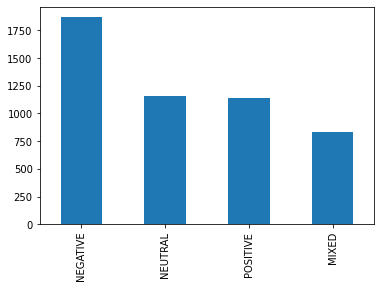

In [47]:
df_clean.sentimentAWS.value_counts().plot(kind='bar')

In [48]:
path='/content/drive/My Drive/Analitics_Esp/'
df_clean.to_csv(path+'SearRCNTV_AWS.csv', encoding='utf-8-sig')

In [ ]:
#df_clean=pd.read_csv(path+'SearRCNTV_AWS.csv', encoding='utf-8-sig')

In [49]:
df_clean[df_clean['sentimentAWS']=='POSITIVE']['tweet']

2       nunca pude ver esa novela. dicen que es buenís...
14      hermosa telenovela, hermosos actores mark y ca...
22      está triunfando a nivel internacional, le ha i...
24      me encanta !! el papel de gregorio pernía me h...
26           mi ana de protagonista aparte canta precioso
                              ...                        
4980    carolina: "eso me han dicho que haga" el poder...
4982    un abrazo a todos y cada uno, gracias pero mil...
4988    cierto,pero no se noto mucho,no alcanzo a ser ...
4989    aída morales, aída bossa a y stiwi pero con lo...
4992    señores master chef de , hoy les doy las graci...
Name: tweet, Length: 1143, dtype: object

In [50]:
df_clean[df_clean['sentimentAWS']=='NEGATIVE']['tweet']

0       perdón no fue el mismo q hizo botar a del por ...
3                                   y todos unos fiascos.
5       no no y no, va a tener el mismo destino de fra...
6                                       que vieja tan fea
7       que no dañen a mi novela con refritos q se me ...
                              ...                        
4985    y ahí solo hay tres que tienen y la gente sigu...
4986    esta tipa es un asco de persona, no debieron i...
4987                                   jamás entendieron.
4993    pero si es una payasa ella misma se ridiculiza...
4998    esa cosa llamada isabela debería aprender algo...
Name: tweet, Length: 1871, dtype: object

In [51]:
##Lenguaje dominante de los tuits
comprehend.detect_dominant_language(Text=text)

{'Languages': [{'LanguageCode': 'es', 'Score': 0.997227132320404}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '63',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:31:31 GMT',
   'x-amzn-requestid': '7a086409-bc57-42a5-96aa-5bc74413674e'},
  'HTTPStatusCode': 200,
  'RequestId': '7a086409-bc57-42a5-96aa-5bc74413674e',
  'RetryAttempts': 0}}

In [52]:
##Detectar sintaxis
comprehend.detect_syntax(Text=text,LanguageCode='es')

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '1425',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:31:50 GMT',
   'x-amzn-requestid': 'fd6f4ec6-7bbc-4e95-bb42-549926e9cffa'},
  'HTTPStatusCode': 200,
  'RequestId': 'fd6f4ec6-7bbc-4e95-bb42-549926e9cffa',
  'RetryAttempts': 0},
 'SyntaxTokens': [{'BeginOffset': 0,
   'EndOffset': 4,
   'PartOfSpeech': {'Score': 0.9989209175109863, 'Tag': 'DET'},
   'Text': 'Este',
   'TokenId': 1},
  {'BeginOffset': 5,
   'EndOffset': 10,
   'PartOfSpeech': {'Score': 0.9957601428031921, 'Tag': 'NOUN'},
   'Text': 'curso',
   'TokenId': 2},
  {'BeginOffset': 11,
   'EndOffset': 13,
   'PartOfSpeech': {'Score': 0.9999927282333374, 'Tag': 'VERB'},
   'Text': 'es',
   'TokenId': 3},
  {'BeginOffset': 14,
   'EndOffset': 17,
   'PartOfSpeech': {'Score': 0.9988611936569214, 'Tag': 'DET'},
   'Text': 'una',
   'TokenId': 4},
  {'BeginOffset': 18,
   'EndOffset': 27,
   'PartOfSpeech': {'Score': 0.9865432977676392, 

In [53]:
##Detectar entidades
comprehend.detect_entities(Text=text,LanguageCode='es')

{'Entities': [],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '15',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:32:05 GMT',
   'x-amzn-requestid': '459ca40a-d1e2-4cae-b8b4-0bda5e3530f1'},
  'HTTPStatusCode': 200,
  'RequestId': '459ca40a-d1e2-4cae-b8b4-0bda5e3530f1',
  'RetryAttempts': 0}}

In [55]:
comprehend.detect_entities(Text='Colombia es un país maravilloso',LanguageCode='es')

{'Entities': [{'BeginOffset': 0,
   'EndOffset': 8,
   'Score': 0.9258818626403809,
   'Text': 'Colombia',
   'Type': 'LOCATION'}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '109',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:33:09 GMT',
   'x-amzn-requestid': '8b770069-e408-4439-9d8d-b46bf1eb498d'},
  'HTTPStatusCode': 200,
  'RequestId': '8b770069-e408-4439-9d8d-b46bf1eb498d',
  'RetryAttempts': 0}}

Para traducir texto amazon tiene otra API

In [54]:
translate = boto3.client(service_name='translate', region_name="us-east-2")
result = translate.translate_text(Text=text,SourceLanguageCode="es", TargetLanguageCode="en")
result

{'ResponseMetadata': {'HTTPHeaders': {'cache-control': 'no-cache',
   'content-length': '128',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:33:06 GMT',
   'x-amzn-requestid': '0d7816f9-a9b5-42bf-b8b1-9a08d5cca29a'},
  'HTTPStatusCode': 200,
  'RequestId': '0d7816f9-a9b5-42bf-b8b1-9a08d5cca29a',
  'RetryAttempts': 0},
 'SourceLanguageCode': 'es',
 'TargetLanguageCode': 'en',
 'TranslatedText': 'This course is wonderful. Virtual classes are also good'}

In [57]:
text

'Este curso es una maravilla. Las clases virtuales también son buenas'

In [56]:
result['TranslatedText']

'This course is wonderful. Virtual classes are also good'

# Otras bibliotecas
Se pueden utilizar muchas otras biblioteca para análisis de sentimientos, la mayoría son para idioma inglés, pero si el texto se traduce, también se pueden usar.

### Vader

In [58]:
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 13.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11


In [59]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [60]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [61]:
df_clean['tweet'][13]

'si necesitan yo me soy voluntaria para escribirles una telenovela top. no tienen que seguir haciendo remakes'

In [62]:
lines_list = tokenize.sent_tokenize(df_clean['tweet'][14])
lines_list

['hermosa telenovela, hermosos actores mark y carolina.']

In [63]:
##Con esta biblioteca estamos intentando determinar el sentimiento del tuit anterior
for sentence in lines_list:
  sid = SentimentIntensityAnalyzer()
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print(k, ss[k])
  print()

hermosa telenovela, hermosos actores mark y carolina.
compound 0.0
neg 0.0
neu 1.0
pos 0.0



Traducir con AWS

In [ ]:
translate = boto3.client(service_name='translate', region_name="us-east-2")

In [64]:
result = translate.translate_text(Text=df_clean['tweet'][14],SourceLanguageCode="es", TargetLanguageCode="en")
result

{'ResponseMetadata': {'HTTPHeaders': {'cache-control': 'no-cache',
   'content-length': '130',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 04 Aug 2022 00:36:18 GMT',
   'x-amzn-requestid': 'f4e34d1e-c760-4f67-adf7-8c9bdf5b69fd'},
  'HTTPStatusCode': 200,
  'RequestId': 'f4e34d1e-c760-4f67-adf7-8c9bdf5b69fd',
  'RetryAttempts': 0},
 'SourceLanguageCode': 'es',
 'TargetLanguageCode': 'en',
 'TranslatedText': 'beautiful soap opera, beautiful actors Mark and Carolina.'}

In [65]:
result['TranslatedText']

'beautiful soap opera, beautiful actors Mark and Carolina.'

In [66]:
lines_list = tokenize.sent_tokenize(result['TranslatedText'])
lines_list

['beautiful soap opera, beautiful actors Mark and Carolina.']

In [67]:
for sentence in lines_list:
  sid = SentimentIntensityAnalyzer()
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print(k, ss[k])
  print()

beautiful soap opera, beautiful actors Mark and Carolina.
compound 0.8316
neg 0.0
neu 0.435
pos 0.565



In [68]:
df_clean

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet,tweet_wE,Sent_AWS,sentimentAWS,polarityAWS
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,perdón no fue el mismo q hizo botar a del por ...,perdón no fue el mismo q hizo botar a del por...,"[NEGATIVE, 0.5424495339393616]",NEGATIVE,0.542450
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"ya habían hecho un refrito, ¿no?","ya habían hecho un refrito, ¿no?","[NEUTRAL, 0.41989219188690186]",NEUTRAL,0.419892
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,nunca pude ver esa novela. dicen que es buenís...,nunca pude ver esa novela. dicen que es buení...,"[POSITIVE, 0.9896815419197083]",POSITIVE,0.989682
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,y todos unos fiascos.,y todos unos fiascos.,"[NEGATIVE, 0.6799343228340149]",NEGATIVE,0.679934
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,avance de en las noches por .,avance de en las noches por .,"[NEUTRAL, 0.6791435480117798]",NEUTRAL,0.679144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:10:46-05:00,@CanalRCN Menos la cosa llamada Isabela,1545983844666466307,Pavel11604545,[],NaN,[],NaN,menos la cosa llamada isabela,menos la cosa llamada isabela,"[MIXED, 0.5160946249961853]",MIXED,0.516095
4996,4996,https://twitter.com/LiliaVanegas5/status/15459...,2022-07-09 23:06:56-05:00,@CanalRCN Manuela,1545982881977229313,LiliaVanegas5,[],NaN,[],NaN,manuela,manuela,"[NEUTRAL, 0.9755014181137085]",NEUTRAL,0.975501
4997,4997,https://twitter.com/davidvirguez/status/154598...,2022-07-09 23:04:14-05:00,@Clauval1256 @CanalRCN @Masterchef_Co jajaja y...,1545982203720605696,davidvirguez,[],NaN,[],NaN,jajaja yo también lo pensé,jajaja yo también lo pensé,"[NEUTRAL, 0.7178854942321777]",NEUTRAL,0.717885
4998,4998,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:03:02-05:00,@CanalRCN @carogomezfilm Esa cosa llamada Isab...,1545981899751018496,Pavel11604545,[],NaN,[],NaN,esa cosa llamada isabela debería aprender algo...,esa cosa llamada isabela debería aprender alg...,"[NEGATIVE, 0.5348050594329834]",NEGATIVE,0.534805


In [ ]:
result = translate.translate_text(Text=df_clean['tweet'][19],SourceLanguageCode="es", TargetLanguageCode="en")
result

{'ResponseMetadata': {'HTTPHeaders': {'cache-control': 'no-cache',
   'connection': 'close',
   'content-length': '203',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 03 Aug 2022 20:29:06 GMT',
   'x-amzn-requestid': '5e0f6689-9a2a-4bda-801b-75b5eb406c1d'},
  'HTTPStatusCode': 200,
  'RequestId': '5e0f6689-9a2a-4bda-801b-75b5eb406c1d',
  'RetryAttempts': 0},
 'SourceLanguageCode': 'es',
 'TargetLanguageCode': 'en',
 'TranslatedText': ' telemundo in co-producing with rcn does not work for them coffee and silver was a disaster and the last one was taken off the air'}

In [ ]:
result['TranslatedText']

' telemundo in co-producing with rcn does not work for them coffee and silver was a disaster and the last one was taken off the air'

In [ ]:
lines_list = tokenize.sent_tokenize(result['TranslatedText'])
lines_list

[' telemundo in co-producing with rcn does not work for them coffee and silver was a disaster and the last one was taken off the air']

In [ ]:
for sentence in lines_list:
  sid = SentimentIntensityAnalyzer()
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print(k, ss[k])
  print()

 telemundo in co-producing with rcn does not work for them coffee and silver was a disaster and the last one was taken off the air
compound -0.6249
neg 0.151
neu 0.849
pos 0.0



In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('😀😁')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

### Pipeline (ESTA ES MUCHO MEJOR QUE LA ANTERIOR)

ESTA BIBLIOTECA TIENE VARIOS MODELOS PARA HACER EL ANALISIS DE SENTIMIENTO

In [69]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 10.2 MB/s 
     |████████████████████████████████| 101 kB 6.3 MB/s 
     |████████████████████████████████| 6.6 MB 35.7 MB/s 
     |████████████████████████████████| 596 kB 48.0 MB/s 


In [70]:
from transformers import pipeline

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [71]:
sentiment = pipeline(task = 'sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [72]:
results = sentiment('i am good')

In [73]:
results

[{'label': 'POSITIVE', 'score': 0.999847412109375}]

In [74]:
print (sentiment.model.config)

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.21.0",
  "vocab_size": 30522
}



In [75]:
results = sentiment('Esto está mal')
results

[{'label': 'POSITIVE', 'score': 0.8047382831573486}]

In [ ]:
sentiment=pipeline('sentiment-analysis',model='bert-base-multilingual-cased')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
results = sentiment('Esto está mal')
results

[{'label': 'LABEL_0', 'score': 0.5650395750999451}]

In [ ]:
print (sentiment.model.config)

BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



### Biblioteca pipiline para análisis de sentimiento multilengua

In [76]:
sentiment_m = pipeline(task = 'sentiment-analysis',
                     model = 'nlptown/bert-base-multilingual-uncased-sentiment',
                     tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')

In [77]:
print (sentiment_m.model.config)

BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_to

In [78]:
results = sentiment_m('Esto está mal')
results

[{'label': '1 star', 'score': 0.6360455751419067}]

In [79]:
results2 = sentiment_m('La izquierda es comunista')
results2

[{'label': '1 star', 'score': 0.3385980427265167}]

In [80]:
results3 = sentiment_m('Debemos aprender a respetarnos entre los diferentes')

In [81]:
results3

[{'label': '4 stars', 'score': 0.401847243309021}]

In [89]:
results4 = sentiment_m('esta libreria es una porqueria ')
results4

[{'label': '1 star', 'score': 0.6100948452949524}]

### Modelos entrenados en español
Exiten algunos modelos que han sido entrenados con español, como:


*   pysentimiento/robertuito-sentiment-analysis




In [90]:
sentiment_pipeline = pipeline('text-classification', 
                              model="pysentimiento/robertuito-sentiment-analysis")

In [98]:
results = sentiment_pipeline('Golpear a los niños no esta bien')
results

[{'label': 'NEG', 'score': 0.9986055493354797}]

In [99]:
sentiment_es = pipeline(task = 'sentiment-analysis',
                     model='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',
                     tokenizer=(
        'mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',  
        {"use_fast": False}
    ))

Some weights of the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForSequenceClassification: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to b

In [ ]:
print (sentiment_es.model.config)

BertConfig {
  "_name_or_path": "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31002
}



In [103]:
results = sentiment_es('muy mal y pesimo')
results

[{'label': 'LABEL_1', 'score': 0.5382711291313171}]

## Orange

In [ ]:
df_orange=pd.read_csv('/content/drive/MyDrive/Analitics_Esp/resultOrangeTweets_.csv',encoding='latin-1')

In [ ]:
df_orange.head()

,Tweet,Score
0,! esta nota es rejunte de info mal ensamblada!...,-4.08163
1,quien en su puto sano juicio le tendría envidi...,0.00000
2,falso montaje,-50.00000
3,deben de detener a este salvaje hp.,-12.50000
4,"isabella feliz, su arrogancia, su falta de lid...",-9.80392


In [ ]:
df_orange['Sentiment']=df_orange['Score'].apply(lambda s: 'Positive' if s>0 else 'Neutral' if s==0 else 'Negative')

In [ ]:
df_orange

,Tweet,Score,Sentiment
0,! esta nota es rejunte de info mal ensamblada!...,-4.08163,Negative
1,quien en su puto sano juicio le tendría envidi...,0.00000,Neutral
2,falso montaje,-50.00000,Negative
3,deben de detener a este salvaje hp.,-12.50000,Negative
4,"isabella feliz, su arrogancia, su falta de lid...",-9.80392,Negative
...,...,...,...
4995,ole... sin las presentadoras es como aburrido....,-7.14286,Negative
4996,oigogan y cuándo le piensan contar a colombia ...,-6.25000,Negative
4997,debe andar mal esa audiencia en para intentar ...,-23.07690,Negative
4998,"como raro ni y muuuucho menos se pronuncian, p...",0.00000,Neutral


In [ ]:
df_orange['Sentiment'].value_counts()

Negative    1953
Neutral     1859
Positive    1188
Name: Sentiment, dtype: int64

NEGATIVE    1888
NEUTRAL     1266
POSITIVE     925
MIXED        921

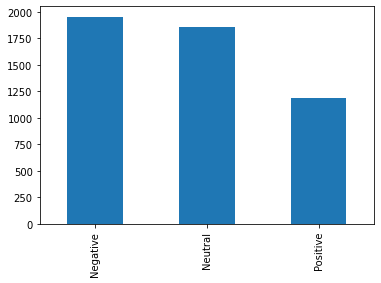

In [ ]:
df_orange['Sentiment'].value_counts().plot(kind='bar')